# Segmentacion de Clientes
## Objetivo: 
El propósito de este análisis es **descubrir** y **definir** patrones ocultos que permitan agrupar a los distintos tipos de clientes, lo que se conoce como segmentación del mercado. Al hacerlo, se puede tener un enfoque más específico para llegar a los consumidores, orientar las políticas de marketing, tomar decisiones estratégicas de manera más efectiva y como consecuencia, aumentar las ganancias del negocio.
## Conjunto de Datos: (200 observaciones y 5 caracteristicas)
* CustomerID: identificador único del cliente
* Gender: género del cliente
* Age: edad del cliente
* Annual Income (k$): ingresos mensuales del cliente
* Spending Score (1-100): puntaje relacionado al nivel de gastos del cliente

In [1]:
import io
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_samples, silhouette_score
sns.set()

In [3]:
df = pd.read_csv('Mall_Customers.csv') #compu agus

In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Análisis de variables

In [ ]:
for col in df.select_dtypes(['object']).columns:
  print(col, '\n')
  print('Cantidad de valores unicos: ', df[col].nunique())
  if df[col].nunique()<15:
    print(df[col].value_counts())
  print('----------------\n')

Gender 

Cantidad de valores unicos:  2
Female    112
Male       88
Name: Gender, dtype: int64
----------------



In [ ]:
for col in df.select_dtypes(['int64']).columns:
  print(col, '\n')
  print('Cantidad de valores unicos: ', df[col].nunique())
  if df[col].nunique()<15:
    print(df[col].value_counts())
  print('----------------\n')

CustomerID 

Cantidad de valores unicos:  200
----------------

Age 

Cantidad de valores unicos:  51
----------------

Annual Income (k$) 

Cantidad de valores unicos:  64
----------------

Spending Score (1-100) 

Cantidad de valores unicos:  84
----------------



In [ ]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
df.shape

(200, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


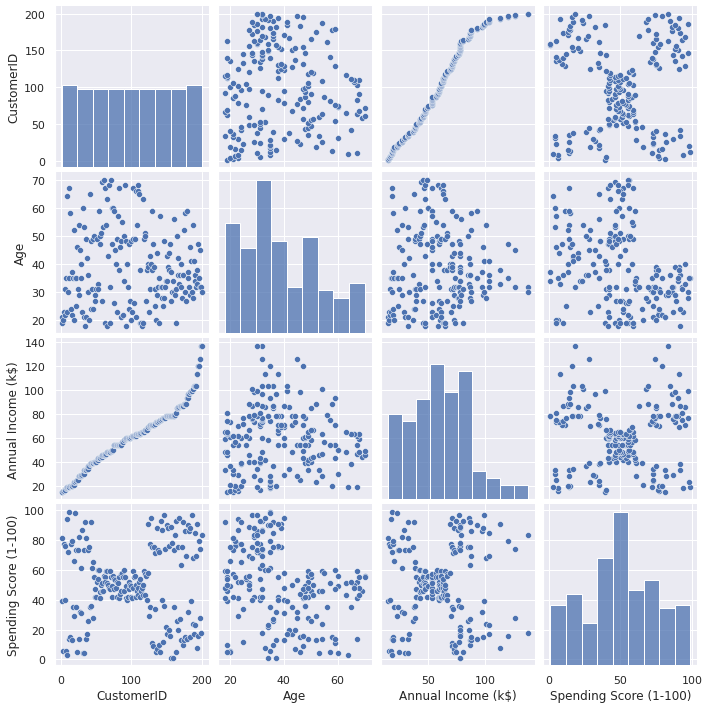

In [ ]:
sns.pairplot(df)

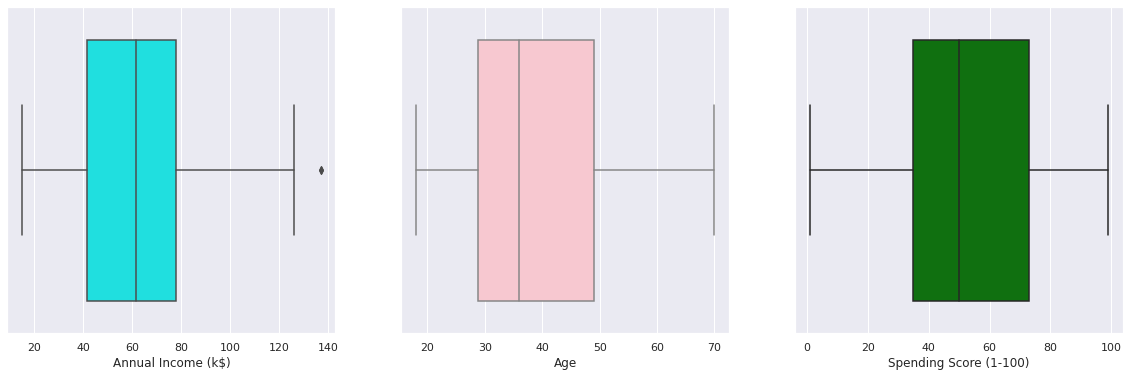

In [ ]:
plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
sns.boxplot(data=df, x='Annual Income (k$)', color="cyan")
plt.subplot(1,3,2)
sns.boxplot(data=df, x='Age', color= "pink") #edad maxima 70
plt.subplot(1,3,3)
sns.boxplot(data=df, x='Spending Score (1-100)', color= "green")
plt.show() 

In [ ]:
df[df['Annual Income (k$)'] == 137] # estos dos son outliers

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
198,199,Male,32,137,18
199,200,Male,30,137,83


In [ ]:
df_mas40 = df[df.Age >= 40]

In [ ]:
df_mas40['Annual Income (k$)'].describe()

count     84.000000
mean      58.821429
std       22.166490
min       19.000000
25%       44.000000
50%       57.500000
75%       71.000000
max      126.000000
Name: Annual Income (k$), dtype: float64

In [ ]:
df[df['Spending Score (1-100)']>=50]['Age'].describe() 

count    102.000000
mean      34.921569
std       13.313201
min       18.000000
25%       26.250000
50%       31.500000
75%       38.750000
max       70.000000
Name: Age, dtype: float64

In [ ]:
df[df['Spending Score (1-100)']>=80]['Age'].describe()

count    30.000000
mean     30.600000
std       5.745163
min      18.000000
25%      28.250000
50%      30.500000
75%      35.000000
max      40.000000
Name: Age, dtype: float64

In [ ]:
df[(df['Age']<=38)&(df['Age']>=26)]['Spending Score (1-100)'].describe()

count    75.000000
mean     61.426667
std      26.588543
min       1.000000
25%      42.000000
50%      69.000000
75%      83.000000
max      99.000000
Name: Spending Score (1-100), dtype: float64

In [ ]:
df[(df['Age']>=38)|(df['Age']<=26)]['Spending Score (1-100)'].describe()

count    133.000000
mean      44.518797
std       22.998881
min        3.000000
25%       29.000000
50%       46.000000
75%       56.000000
max       95.000000
Name: Spending Score (1-100), dtype: float64

## Análisis Univariada

### Cantidad de Clientes en Funcion del Genero

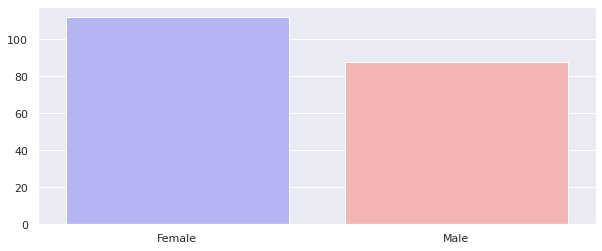

In [ ]:
genders=df.Gender.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=genders.index, y=genders.values,palette="bwr")
plt.show() 

### Cantidad de clientes en Funcion de su edad

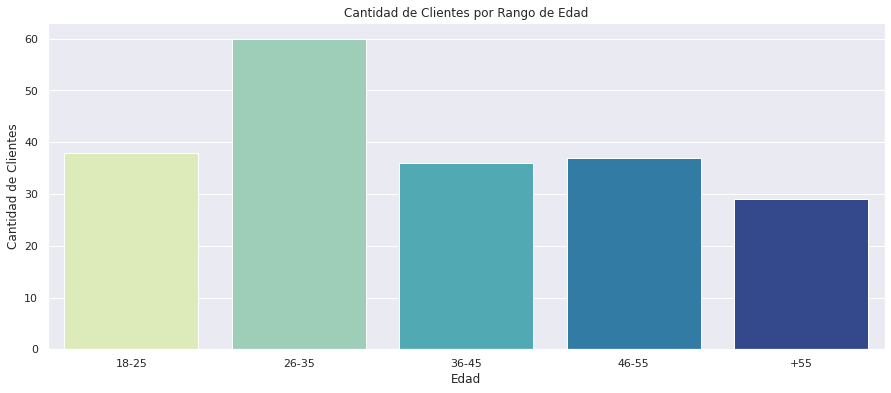

In [ ]:
age18_25 = df.Age[(df.Age <= 25) & (df.Age >= 18)]
age26_35 = df.Age[(df.Age <= 35) & (df.Age >= 26)]
age36_45 = df.Age[(df.Age <= 45) & (df.Age >= 36)]
age46_55 = df.Age[(df.Age <= 55) & (df.Age >= 46)]
age55 = df.Age[df.Age >= 56]
x = ["18-25","26-35","36-45","46-55","+55"]
y=[len(age18_25.values),len(age26_35.values),len(age36_45.values),len(age46_55.values),len(age55.values)]
plt.figure(figsize=(15,6))
sns.barplot(x=x,y=y,palette="YlGnBu")
plt.title("Cantidad de Clientes por Rango de Edad")
plt.xlabel ("Edad")
plt.ylabel("Cantidad de Clientes")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


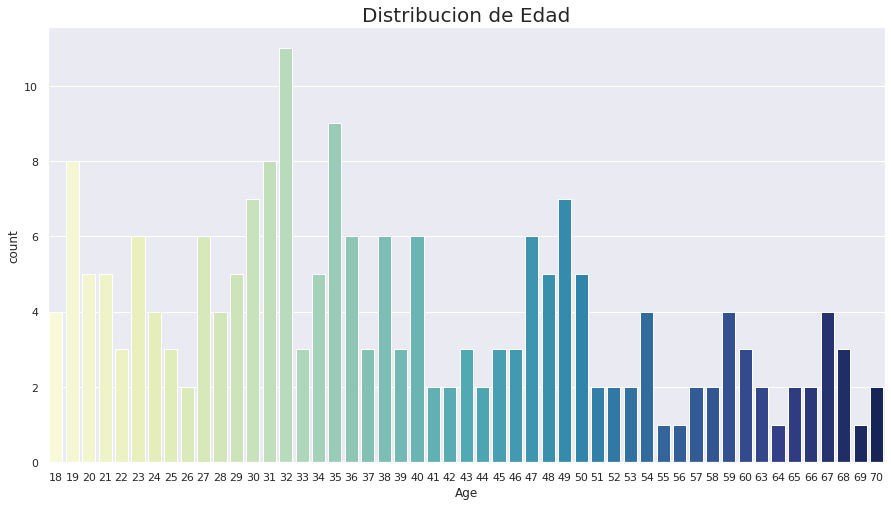

In [ ]:
plt.rcParams['figure.figsize'] = (15, 8)
sns.countplot(df['Age'], palette = 'YlGnBu')
plt.title('Distribucion de Edad', fontsize = 20)
plt.show()

Al observar el gráfico agrupado por rangos, podemos ver que las edades de 26 a 35 son mas frecuentes en comparación con los grupos de mayor edad, pero no hay un patrón claro. Algunos datos interesantes en relacion al segundo gráfico, donde podemos observar la distribucion de los clientes segun sus años de vida, son: 
* Hay iguales nro. de visitantes en el centro comercial para los 18 y 67 años. 
* Las personas de 55, 56, 69, 64 años son menos frecuentes.
* Las personas de 32 años son los visitantes más frecuentes

### Cantidad de Clientes en Funcion del Puntaje otorgado

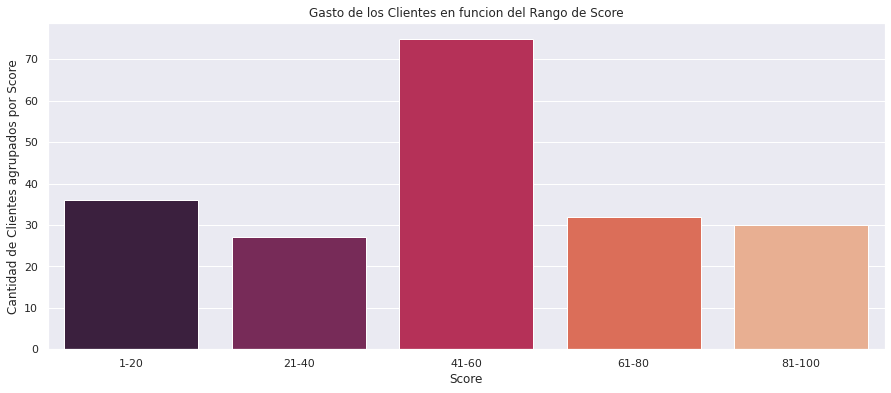

In [ ]:
score1_20 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 1) & (df["Spending Score (1-100)"] <= 20)]
score21_40 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 21) & (df["Spending Score (1-100)"] <= 40)]
score41_60 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 41) & (df["Spending Score (1-100)"] <= 60)]
score61_80 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 61) & (df["Spending Score (1-100)"] <= 80)]
score81_100 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 81) & (df["Spending Score (1-100)"] <= 100)]
score_x = ["1-20","21-40","41-60","61-80","81-100"]
score_y=[len(score1_20.values),len(score21_40.values),len(score41_60.values),len(score61_80.values),len(score81_100.values)]
plt.figure(figsize=(15,6))
sns.barplot(x=score_x,y=score_y,palette="rocket")
plt.title("Gasto de los Clientes en funcion del Rango de Score")
plt.xlabel ("Score")
plt.ylabel("Cantidad de Clientes agrupados por Score")
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


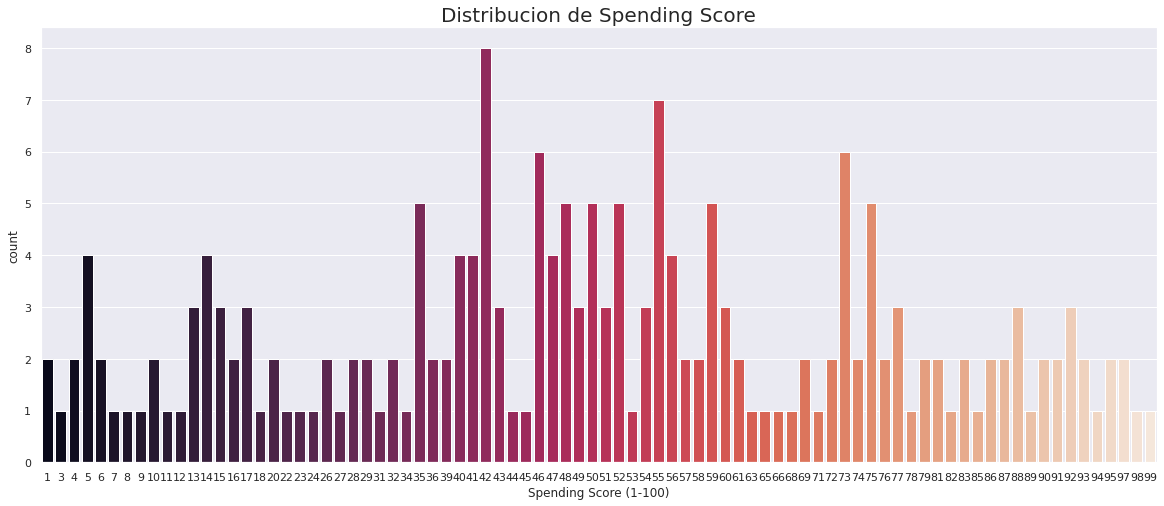

In [ ]:
plt.rcParams['figure.figsize'] = (20, 8)
sns.countplot(df['Spending Score (1-100)'], palette = 'rocket')
plt.title('Distribucion de Spending Score', fontsize = 20)
plt.show()

Estos posiblemente, sean los gráficos más importante desde la perspectiva del negocio, ya que es muy valioso tener algo de intuición e idea sobre el puntaje de gasto de los clientes.

En un nivel general, podemos concluir que la mayoría de los clientes tienen su Puntaje de Gasto en el rango de 41-60. Es interesante que haya clientes que también tengan una puntuación de gasto 1 y una puntuación de gasto 99 también, lo que podría demostrar que se atienden a clientes con necesidades muy variadas. 

### Ingresos Anuales de los Clientes

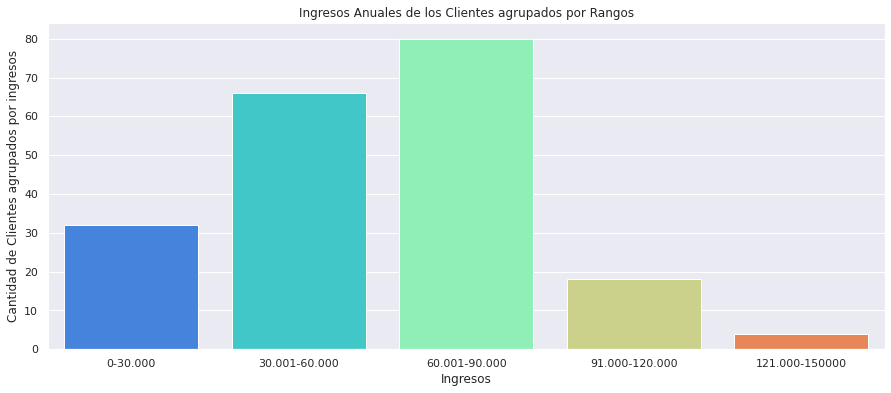

In [ ]:
income0_30 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 0) & (df["Annual Income (k$)"] <= 30)]
income31_60 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 31) & (df["Annual Income (k$)"] <= 60)]
income61_90 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 61) & (df["Annual Income (k$)"] <= 90)]
income91_120 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 91) & (df["Annual Income (k$)"] <= 120)]
income121_150 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 121) & (df["Annual Income (k$)"] <= 150)]
income_x = ["0-30.000","30.001-60.000","60.001-90.000","91.000-120.000","121.000-150000"]
income_y=[len(income0_30.values),len(income31_60.values),len(income61_90.values),len(income91_120.values),len(income121_150.values)]
plt.figure(figsize=(15,6))
sns.barplot(x=income_x,y=income_y,palette="rainbow")
plt.title("Ingresos Anuales de los Clientes agrupados por Rangos")
plt.xlabel ("Ingresos")
plt.ylabel("Cantidad de Clientes agrupados por ingresos")
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


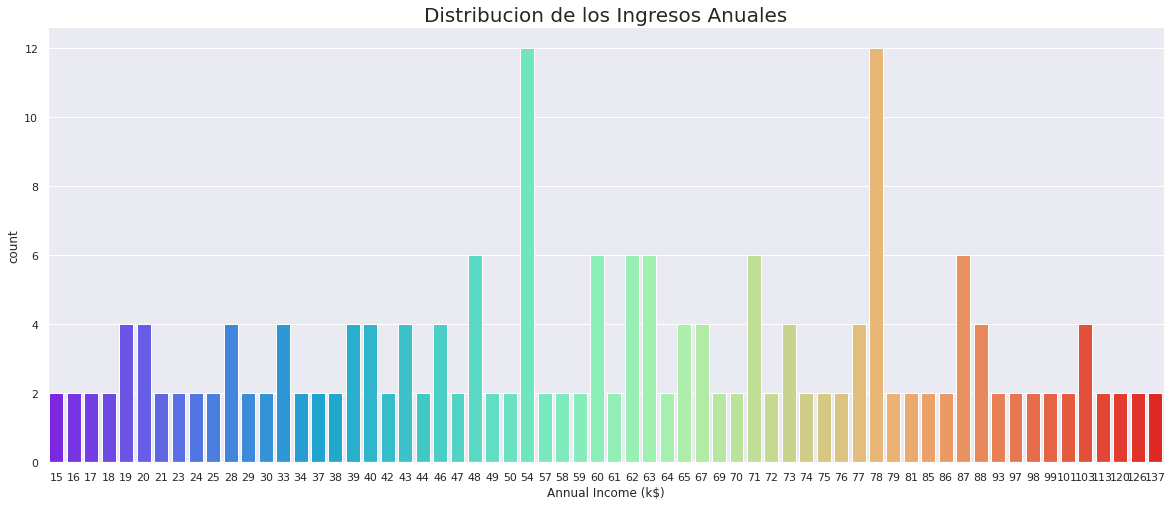

In [ ]:
plt.rcParams['figure.figsize'] = (20, 8)
sns.countplot(df['Annual Income (k$)'], palette = 'rainbow')
plt.title('Distribucion de los Ingresos Anuales', fontsize = 20)
plt.show()

Estos gráficos nos sirven, para explicar mejor la distribución en función a cada nivel de ingresos. Es interesante que haya clientes con ingresos anuales, que van desde 15k a 137k. Hay más clientes que tienen sus ingresos anuales de 54k ó 78k.

### Cantidad de clientes según edad, puntuación de gastos e ingresos anuales


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

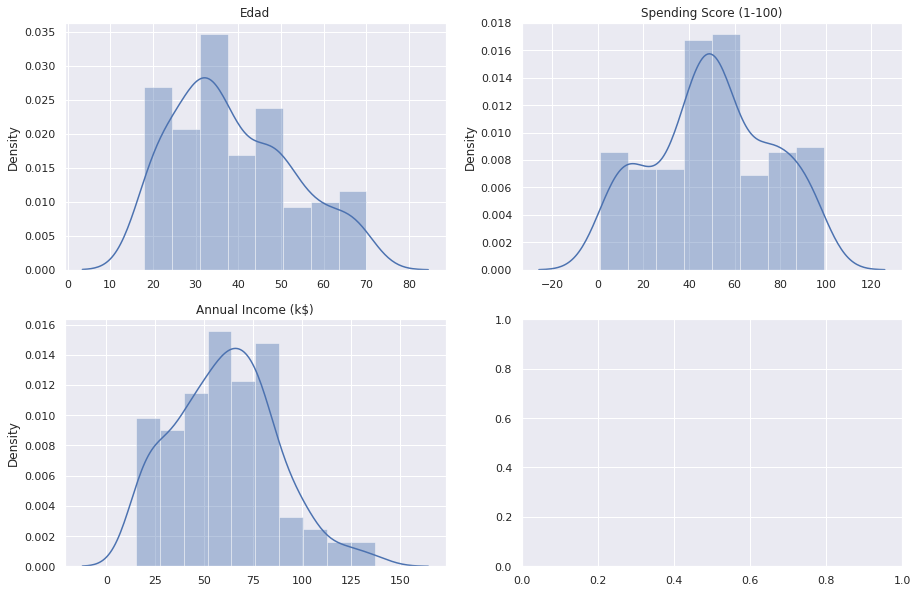

In [ ]:
figura, graficos = plt.subplots(nrows=2, ncols=2, figsize=(15,10))
sns.distplot(x=df.Age, ax=graficos[0][0])
sns.distplot(x=df['Spending Score (1-100)'], ax=graficos[0][1])
sns.distplot(x=df['Annual Income (k$)'], ax=graficos[1][0])

#Añadir títulos
graficos[0][0].set_title('Edad')
graficos[0][1].set_title('Spending Score (1-100)')
graficos[1][0].set_title('Annual Income (k$)');

A partir de estos histogramas se puede mostrar visualmente algunas características de los atributos bajo estudio, como la media o el sesgo.
1. La distribución de las edades, por ejemplo, muestra que la mayor proporcion de clientes, tiene alrededor de 35 años y la edad maxima es 70. 
2. El histograma de score, es bien asimetrico y para la mayoria de la poblacion, ronda entre los 40 a 60 puntos. 
3. El histograma de ingresos anuales, muestra que el mayor porcentaje de clientes, percibe ingresos inferiores a 100k, con un sesgo hacia la izquierda y una pendiente(o cola) bien pronunciada para ingresos superiores. Dicho de otra manera, la cantidad de clientes que reciben ingresos superiores a dicho monto, es muy inferior, comparado con la mayoria de los clientes analizados.   



## Análisis Multivariado

### Correlación entre variables

In [ ]:
df.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


In [ ]:
df.corr()[['Spending Score (1-100)']]

,Spending Score (1-100)
CustomerID,0.013835
Age,-0.327227
Annual Income (k$),0.009903
Spending Score (1-100),1.000000


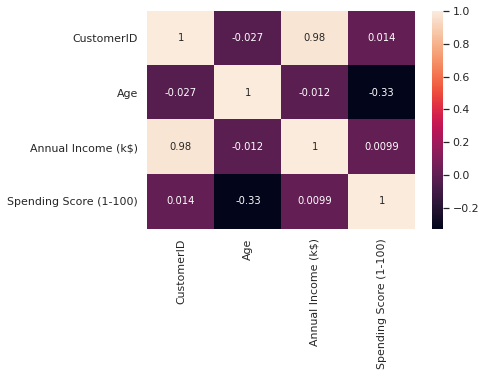

In [ ]:
sns.heatmap(df.corr(), annot=True);

Este gráfico refleja las caracteristicas mas relacionadas con colores oscuros y las menos relacionadas con colores claros, por lo cual podemos ver que no hay mucha correlación entre las variables, aunque existe una leve relación inversa entre la edad y el puntaje de gasto (-.33). En este punto, es importante realizar más pruebas que nos permitan explorar su relación, ya que pueden surgir tendencias dentro de algunos subconjuntos de datos. 

### Ingresos anuales, Puntuacion de gastos y Género
¿ Existe una relacion entre los ingresos anuales y la puntuacion de gastos (agrupada por genero)?

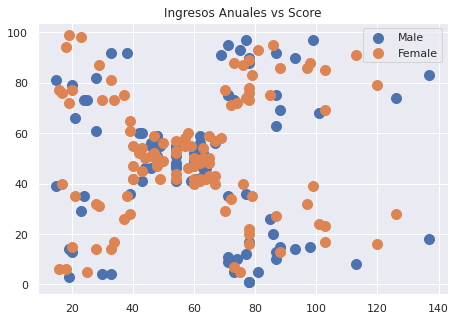

In [ ]:
plt.figure(figsize=(25,5))
plt.subplot(1,3,2)
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Annual Income (k$)',y = 'Spending Score (1-100)' ,data = df[df['Gender'] == gender] ,s = 100 , label = gender)
    plt.title('Ingresos Anuales vs Score')
plt.legend()
plt.show()

* Es difícil identificar una relación clara entre los ingresos y la puntuacion de gastos; sin embargo, parece que se forman grupos dentro de los datos. 
* Es difícil interpretar la relación entre el género y la puntuación de gastos con este gráfico, por lo que se deben realizar más pruebas.
* Pareciera que los clientes mayores a 65 años, gastan de forma mas moderada y los clientes de hasta 40 años aproximadamente son mujeres. (este ultimo subgrupo podria estar formado por madres de niños pequeños).  

### Edad, Ingresos anuales y Género
¿ Existe una relacion entre la Edad y los ingresos anuales (agrupada por genero)?

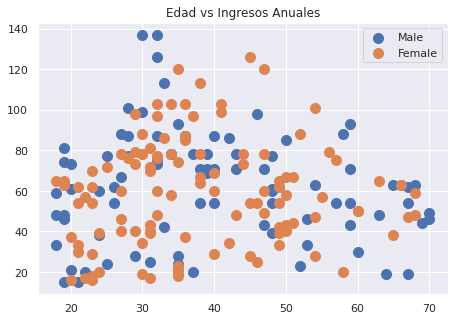

In [ ]:
plt.figure(figsize=(25,5))
plt.subplot(1,3,1)
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Age' , y = 'Annual Income (k$)' , data = df[df['Gender'] == gender] ,label = gender,s=100)
    plt.title('Edad vs Ingresos Anuales')
plt.legend()
plt.show()

La distribucion en los ingresos esta mas concentrada entre los clientes que tienen alrededor de 40 años, ya que se puede notar un ligero aumento, pero estas 2 caracteristicas tienen una relacion inversa 

## Conclusiones y Resumen del EDA: 
Despues de esta fase exploratoria, pudimos comprender la relacion entre las variables y profundizar los conocimientos que son necesarios para el trabajo bajo analisis

•	La edad media de los clientes es de 30 a 40 años.

•	El 56% de los clientes son mujeres y el 44% hombres

•	Los clientes con bajos ingresos anuales, tienen puntajes de gasto relativamente bajos.

•	Los clientes con ingresos suficientes bajos, son los que más gastan y probablemente los que más se endeudan 

•	La puntuación de gasto de las mujeres es mayor que la de los hombres, pero la diferencia no es demasiado significativa.

•	Las personas de menor edad, gastan menos.

•	La mayoría de los clientes podrían asociarse a la clase media a media alta (ingresos de 60 a 90.000), media = 60,56.000

•	No hay una relación clara entre la puntuación de ingresos y gastos, aunque parece que se forman grupos


# Construyendo el modelo

Antes de comenzar con la contruccion del modelo, se realizo el estandarizado de los datos, ya que el rango de valores dentro de cada característica influirá en cómo se forman los distintos grupos, lo que generalmente no es deseable. 
El agrupamiento de Kmeans usa la distancia euclidiana para medir la similitud entre los objetos, por lo que si una característica tiene un rango mucho más grande que otra característica, dominará las otras características en el proceso de agrupamiento.
Tambien se realizo la transformación de la variable género a variable numérica

Se utiliza Standar Scaler considerando la distribución normal original de las variables.

In [6]:
# usamos función StandardScaler() para estandarizar la matrix.
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
std

StandardScaler()

In [7]:
df_scaler=std.fit_transform(df[['Age','Spending Score (1-100)','Annual Income (k$)']])

Antes de comenzar se decidió hacer una clasificación considerando que las características más importantes a la hora identificar la base de clientes con mayor potencial para la venta de productos son los ingresos anuales ('Annual Income ($)') y el puntaje otorgado a cada cliente según sus gastos ('Spending Score (1-100)'). 

Por ese mismo motivo, los algoritmos implementados se basan en separar grupos considerando únicamente estas dos características. Luego de encontrar los clusters se realizan análisis para cada uno de ellos en base a las demás variables que no fueron utilizadas para generar el modelo (edad y género). De esta manera se logran reconocer características adicionales diferentes para cada modelo que mejoran la toma de decisiones finales.

## Kmeans

El primer algoritmo a implementar es K-means. 

- Se toman las dos columnas de interés del dataset original ya escaladas en este punto, 
- se aplica el método del codo y de la silueta para determinar el n° de clusters (k) óptimo,
- se procede a entrenar el modelo con el k seleccionado,
- se agrega una nueva columna al dataset original (que contiene todas las features) denominada 'cluster_kmeans' que contiene el label resultante de la aplicación de k-means para cada cliente,
- se realiza un análisis de cada cluster para encontrar características comunes y poder tomar decisiones.

In [8]:
df_cluster=df_scaler[:,1:]

### Codo

In [9]:
Ncluster=np.arange(2,7)
# Preparamos una lista donde vamos a ir agregando las distancias medias
Sum_of_squared_distances = []
# Fiteammos un modelo para cada numero de cluster que queremos testear
for k in Ncluster:
    # Definimos y entrenamos el modelo
    km = KMeans(n_clusters=k)
    km = km.fit(df_cluster)
    # Calculamos la distancia media y agregamos a la lista
    distancia_total = km.inertia_
    distancia_media = np.divide(distancia_total,df_cluster.shape[0])
    Sum_of_squared_distances.append(distancia_media)

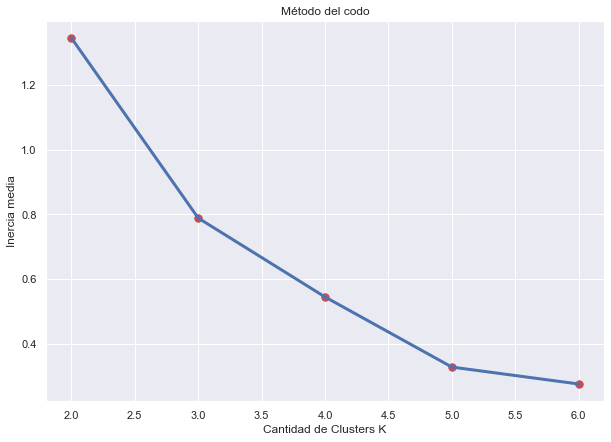

In [10]:
plt.figure(figsize = (10,7))
plt.plot(Ncluster, Sum_of_squared_distances, lw=3)
plt.scatter(Ncluster, Sum_of_squared_distances,s=55,c='r')
plt.xlabel('Cantidad de Clusters K')
plt.ylabel('Inercia media')
plt.title('Método del codo')

plt.show()

### silhouette

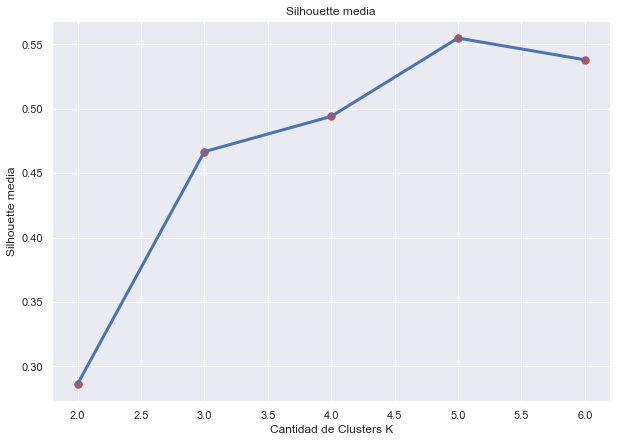

In [11]:
# Preparamos una lista donde vamos a ir agregando los valores medios de silhouette
lista_sil = []
# Fiteammos un modelo para cada numero de cluster que queremos testear
for k in range(2,7):
    # Definimos y entrenamos el modelo
    km = KMeans(n_clusters=k)
    km = km.fit(df_cluster)
    
    # Tomamos las etiquetas
    etiquetas = km.labels_
    
    # Calculamos el silhouette 
    valor_medio_sil = silhouette_score(df_cluster, etiquetas)
    lista_sil.append(valor_medio_sil)
    
plt.figure(figsize = (10,7))
plt.plot(Ncluster, lista_sil, lw=3)
plt.scatter(Ncluster, lista_sil,s=55,c='r')
plt.xlabel('Cantidad de Clusters K')
plt.ylabel('Silhouette media')
plt.title('Silhouette media')

plt.show()

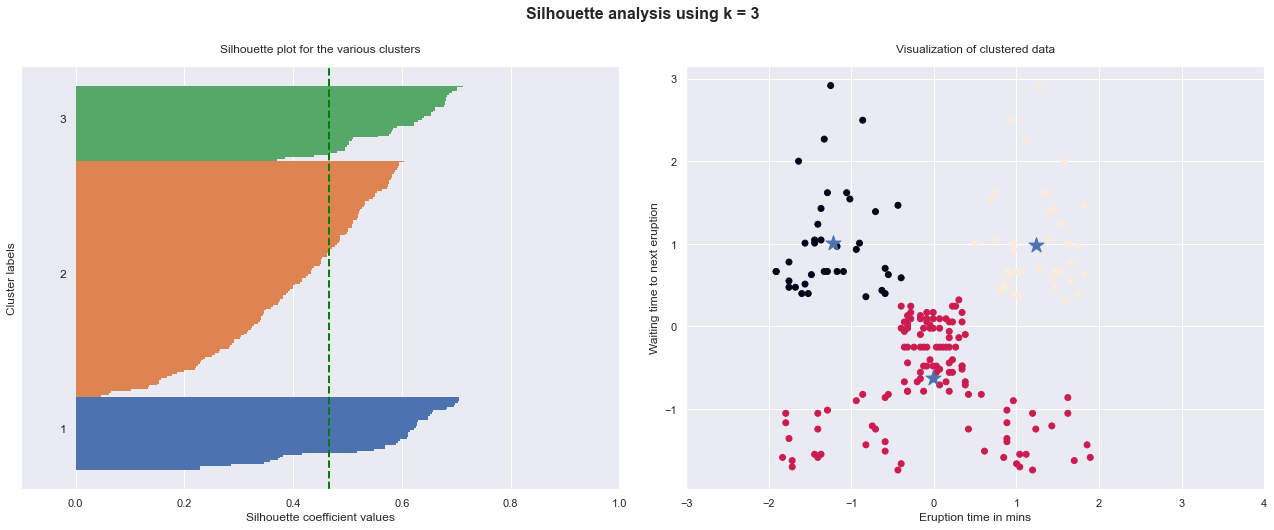

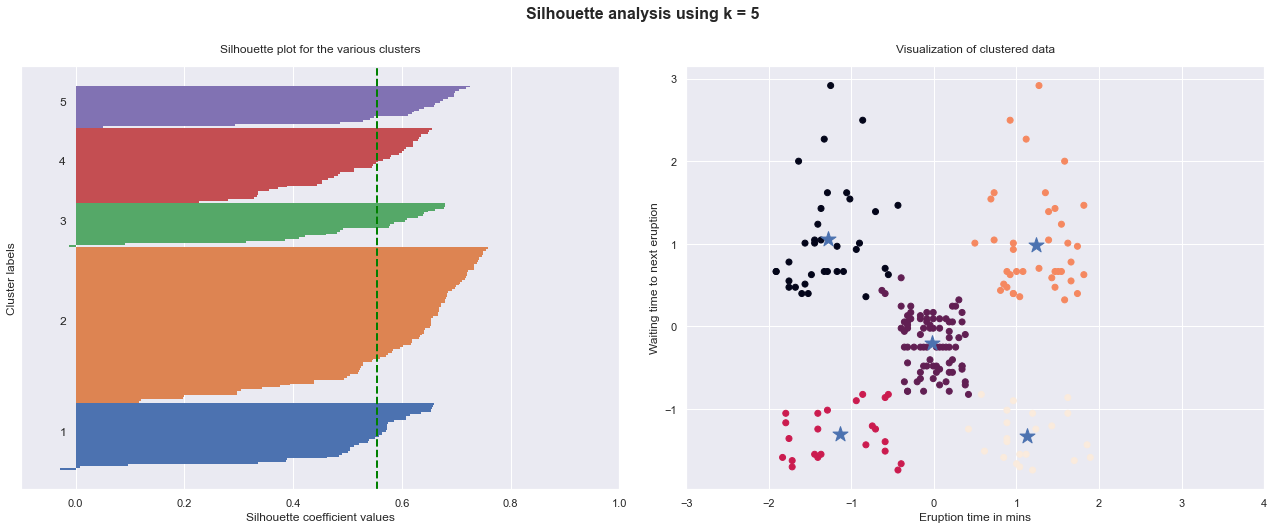

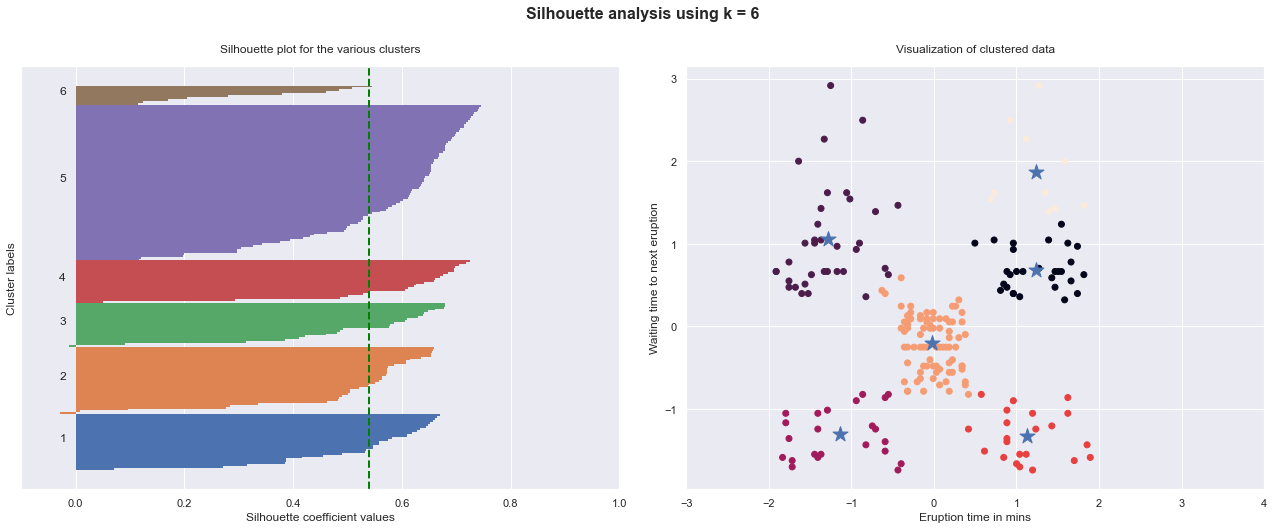

In [12]:
# Aca definen la lista de ks para los cuales quieren hacer un gráfico
lista_k = [3, 5, 6]

for i, k in enumerate(lista_k):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    
    # Run the Kmeans algorithm
    km = KMeans(n_clusters=k)
    labels = km.fit_predict(df_cluster)
    centroids = km.cluster_centers_

    # Get silhouette samples
    silhouette_vals = silhouette_samples(df_cluster, labels)

    # Silhouette plot
    y_ticks = []
    y_lower, y_upper = 0, 0
    for i, cluster in enumerate(np.unique(labels)):
        cluster_silhouette_vals = silhouette_vals[labels == cluster]
        cluster_silhouette_vals.sort()
        y_upper += len(cluster_silhouette_vals)
        ax1.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
        ax1.text(-0.03, (y_lower + y_upper) / 2, str(i + 1))
        y_lower += len(cluster_silhouette_vals)

    # Get the average silhouette score and plot it
    avg_score = np.mean(silhouette_vals)
    ax1.axvline(avg_score, linestyle='--', linewidth=2, color='green')
    ax1.set_yticks([])
    ax1.set_xlim([-0.1, 1])
    ax1.set_xlabel('Silhouette coefficient values')
    ax1.set_ylabel('Cluster labels')
    ax1.set_title('Silhouette plot for the various clusters', y=1.02);
    
    # Scatter plot of data colored with labels
    ax2.scatter(df_cluster[:, 0], df_cluster[:, 1], c=labels)
    ax2.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='b', s=250)
    ax2.set_xlim([-3, 4])
    ax2.set_xlabel('Eruption time in mins')
    ax2.set_ylabel('Waiting time to next eruption')
    ax2.set_title('Visualization of clustered data', y=1.02)
    ax2.set_aspect('equal')
    plt.tight_layout()
    plt.suptitle(f'Silhouette analysis using k = {k}',
                 fontsize=16, fontweight='semibold', y=1.05);


El mejor K es el 5 ya que la silueta presenta proporciones equitativas en donde ninguna es mucho mas grande o mas chica que otra, siempre comparandose con las siluetas analizadas para los demas K 

### Entrenamiento de K-means con k=5

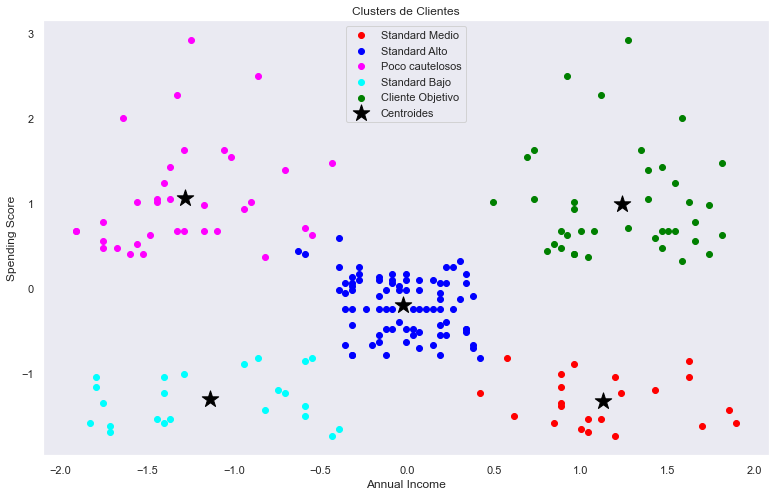

In [13]:
plt.figure(figsize=(13,8))
model = KMeans (n_clusters= 5, random_state= 10)
y_hat = model.fit_predict(df_cluster)
centros_= model.cluster_centers_
etiquetas_ = model.labels_
labels = ["Standard Medio","Standard Alto","Poco cautelosos","Standard Bajo","Cliente Objetivo"]
plt.scatter(df_cluster[y_hat == 0,0], df_cluster[y_hat == 0,1],c='red',label=labels[0])
plt.scatter(df_cluster[y_hat == 1,0], df_cluster[y_hat == 1,1],c='blue',label=labels[1])
plt.scatter(df_cluster[y_hat == 2,0], df_cluster[y_hat == 2,1],c='magenta',label=labels[2])
plt.scatter(df_cluster[y_hat == 3,0], df_cluster[y_hat == 3,1],c='cyan',label=labels[3])
plt.scatter(df_cluster[y_hat == 4,0], df_cluster[y_hat == 4,1],c='green',label=labels[4])
plt.scatter(centros_[:, 0], centros_[:, 1], s = 300, c = 'black', marker="*", label = 'Centroides')
plt.legend()
plt.grid()
plt.title('Clusters de Clientes')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score');

Creación de la columna con los grupos resultantes

In [14]:
df_scan = df.copy()

In [15]:
df_kmeans = df.copy()

In [16]:
df_kmeans['cluster_kmeans'] = etiquetas_

In [17]:
df_kmeans.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster_kmeans
0,1,Male,19,15,39,3
1,2,Male,21,15,81,0
2,3,Female,20,16,6,3
3,4,Female,23,16,77,0
4,5,Female,31,17,40,3


Descripción del puntaje de gastos y del ingreso para cada cluster obtenido

In [18]:
df_kmeans.groupby('cluster_kmeans')['Spending Score (1-100)','Annual Income (k$)'].describe()

<ipython-input-18-cfd039723df4>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_kmeans.groupby('cluster_kmeans')['Spending Score (1-100)','Annual Income (k$)'].describe()


Spending Score (1-100)                                          \
                                count       mean        std   min   25%   50%   
cluster_kmeans                                                                  
0                                22.0  79.363636  10.504174  61.0  73.0  77.0   
1                                81.0  49.518519   6.530909  34.0  44.0  50.0   
2                                35.0  17.114286   9.952154   1.0  10.0  16.0   
3                                23.0  20.913043  13.017167   3.0   9.5  17.0   
4                                39.0  82.128205   9.364489  63.0  74.5  83.0   

                            Annual Income (k$)                              \
                  75%   max              count       mean        std   min   
cluster_kmeans                                                               
0               85.75  99.0               22.0  25.727273   7.566731  15.0   
1               55.00  61.0               81.0  55.296296   8.988109  39.0   
2               23.50  39.0               35.0  88.200000  16.399067  70.0   
3               33.50  40.0               23.0  26.304348   7.893811  15.0   
4               90.00  97.0               39.0  86.538462  16.312485  69.0   

                                           
                  25%   50%    75%    max  
cluster_kmeans                             
0               19.25  24.5  32.25   39.0  
1               48.00  54.0  62.00   76.0  
2               77.50  85.0  97.50  137.0  
3               19.50  25.0  33.00   39.0  
4               75.50  79.0  95.00  137.0

Descripción de la edad para cada grupo

In [19]:
df_kmeans.groupby(['cluster_kmeans']).Age.describe()

,count,mean,std,min,25%,50%,75%,max
cluster_kmeans,,,,,,,,
0,22.0,25.272727,5.257030,18.0,21.25,23.5,29.75,35.0
1,81.0,42.716049,16.447822,18.0,27.00,46.0,54.00,70.0
2,35.0,41.114286,11.341676,19.0,34.00,42.0,47.50,59.0
3,23.0,45.217391,13.228607,19.0,35.50,46.0,53.50,67.0
4,39.0,32.692308,3.728650,27.0,30.00,32.0,35.50,40.0


In [20]:
df_kmeans.groupby(['cluster_kmeans','Gender']).Age.describe()

count       mean        std   min    25%   50%    75%  \
cluster_kmeans Gender                                                          
0              Female   13.0  25.461538   5.221995  20.0  22.00  23.0  30.00   
               Male      9.0  25.000000   5.612486  18.0  21.00  24.0  29.00   
1              Female   48.0  40.895833  14.746423  18.0  27.75  41.5  50.00   
               Male     33.0  45.363636  18.567139  18.0  26.00  48.0  63.00   
2              Female   16.0  43.250000   9.161514  23.0  36.75  44.0  48.25   
               Male     19.0  39.315789  12.867067  19.0  32.50  40.0  47.50   
3              Female   14.0  43.214286  11.682851  20.0  35.25  43.5  49.00   
               Male      9.0  48.333333  15.540270  19.0  37.00  52.0  60.00   
4              Female   21.0  32.190476   3.076021  27.0  30.00  32.0  35.00   
               Male     18.0  33.277778   4.389902  27.0  30.00  32.0  37.50   

                        max  
cluster_kmeans Gender        
0              Female  35.0  
               Male    35.0  
1              Female  68.0  
               Male    70.0  
2              Female  57.0  
               Male    59.0  
3              Female  65.0  
               Male    67.0  
4              Female  38.0  
               Male    40.0

In [21]:
df_jovenes = df_kmeans[df_kmeans['Age']<=40].copy()

In [ ]:
(df_jovenes['Spending Score (1-100)']>=40).sum()

98

In [ ]:
(df_jovenes['Spending Score (1-100)']<=40).sum()

28

In [ ]:
df_jovenes.shape

(122, 6)

In [ ]:
(df['Spending Score (1-100)']>=40).sum()

141

In [ ]:
((df_jovenes['Spending Score (1-100)']>=40).sum()/(df['Spending Score (1-100)']>=40).sum()*100).round(2)

#porcentaje de jóvenes (menores de 40 años) que realizan gran cantidad de compras (score mayor a 40)

69.5

### Resultados k-means

Descripción de los clusters:

Clientes Objetivo (4)
- Amplio rango de edad (entre 19 y 60)
- Son personas con ingresos altos, pero con gastos muy bajos
- Equitativa distribución del sexo en relación a la edad
- Quizás estas son las personas que están insatisfechas con los servicios del centro comercial y estrategicamente, serian los principales clientes objetivos, ya que tienen el potencial de gastar más dinero. Entonces, por ejemplo, la gerencia comercial, podrían intentar agregar nuevas instalaciones/servicios que puedan atraer y tentar a estos clientes.

Clientes Standard Medio (0)
- Es el que mayor cantidad de datos posee, es decir, la población está conformada mayormente por personas con gastos e ingresos medios
- Estas personas NO son los principales objetivos del centro comercial, pero podrían ser consideradas nuevamente y mediante otras técnicas de análisis de datos, lograr un aumento en su puntaje de gasto.

Clientes Poco cautelosos (2)
- La mayoría son jóvenes, siendo la edad máxima 35 años
- Son personas con bajos ingresos, pero con gastos elevados
- equitativa distribución del sexo en relación a la edad
- Son aquellos clientes que por alguna razón, (como puede ser cercania, promociones con tarjetas, uso del patio de comida, etc), van seguido al Mall y compran productos con frecuencia. Es posible que los negocios, no se dirijan a estos clientes de manera particular, porque saben que no los perderán.


Clientes Standard Bajo (3)
- Son personas con sueldos bajos que por lo general, prefieren comprar menos, puede ser porque suelen ser más medidas, ahorrativas y saben cómo gastar. Los negocios del Mall estarán menos interesados en las personas que pertenecen a este grupo.


Clientes Standard Alto (1)
- Se puede inferir que las personas que tienen los gastos más elevados son personas jóvenes (entre 30 y 40).
- Ganan mucho y gastan mucho, este es el caso ideal para el centro comercial, ya que estas personas son las que generan las principales ganancias. Estas personas pueden ser los clientes habituales y seguramente están muy conformes con los servicios que se ofrecen en el lugar.



Identificar la base de clientes con mayor potencial para la venta de producto/s: en primera medida, los clientes pertenecientes al clusters denominado "Clientes Objetivo" y luego los pertenecientes al clusters denominado "Clientes Standard Medio". 





## DBSCAN

El segundo algoritmo a implementar es DBSCAN. 

- Se toman las dos columnas de interés del dataset original ya escaladas en este punto, 
- se aplica el modelo con un radio (epsilon) de 0.4 y cantidad de vecinos (min_samples) de 5,
- se procede a entrenar el modelo con los parámetros seleccionados,
- se identifican cuáles de los puntos son considerados outliers y cuáles pertenecientes a distintos grupos,
- se grafican los grupos obtenidos
- se agrega una nueva columna al dataset original (que contiene todas las features) denominada 'cluster_dbscan' que contiene el label resultante de la aplicación de DBSCAN para cada cliente,
- se realiza un análisis de cada cluster para encontrar características comunes y poder tomar decisiones.

In [22]:
from sklearn.cluster import DBSCAN

# En este paso tenemos que definir el epsilon y en min_samples, los parametros del método.
modelo_db = DBSCAN(eps=0.4, min_samples=5)
modelo_db.fit(df_cluster)

DBSCAN(eps=0.4)

In [23]:
# Consultamos las etiquetas
labels_1 = modelo_db.labels_

In [24]:
# Number of clusters in labels, ignoring noise if present.
n_clusters = len(set(labels_1)) - (1 if -1 in labels_1 else 0)
n_noise = list(labels_1).count(-1) #ptos etiquetados como ruido

In [25]:
print('Estimated number of clusters: %d' % n_clusters)
print('Estimated number of noise points: %d' % n_noise)

Estimated number of clusters: 4
Estimated number of noise points: 15


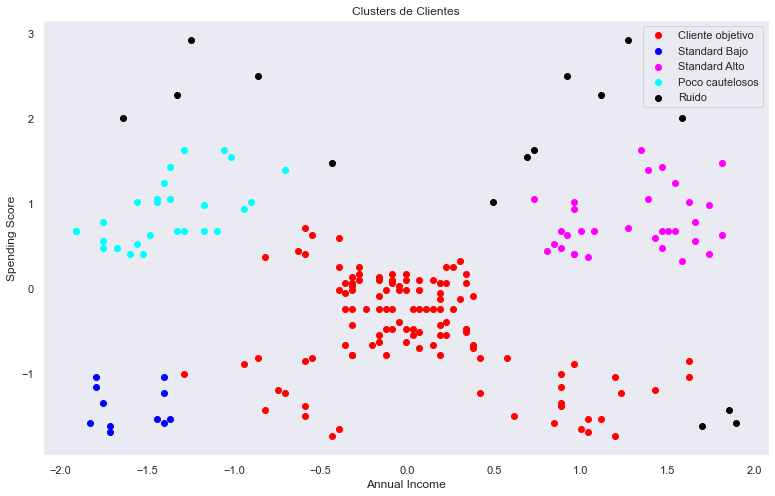

In [26]:
plt.figure(figsize=(13,8))
y_hat = modelo_db.fit_predict(df_cluster)
etiquetas_ = modelo_db.labels_
labels = ["Cliente objetivo","Standard Bajo","Standard Alto","Poco cautelosos","Ruido"]
plt.scatter(df_cluster[y_hat == 0,0], df_cluster[y_hat == 0,1],c='red',label=labels[0])
plt.scatter(df_cluster[y_hat == 1,0], df_cluster[y_hat == 1,1],c='blue',label=labels[1])
plt.scatter(df_cluster[y_hat == 2,0], df_cluster[y_hat == 2,1],c='magenta',label=labels[2])
plt.scatter(df_cluster[y_hat == 3,0], df_cluster[y_hat == 3,1],c='cyan',label=labels[3])
plt.scatter(df_cluster[y_hat == -1,0], df_cluster[y_hat == -1,1],c='black',label=labels[4])
plt.legend()
plt.grid()
plt.title('Clusters de Clientes')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score');

In [27]:
df_dbscan=df_scan.copy()

In [28]:
df_dbscan['clusters']=modelo_db.labels_

In [29]:
df_dbscan.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),clusters
0,1,Male,19,15,39,0
1,2,Male,21,15,81,0
2,3,Female,20,16,6,1
3,4,Female,23,16,77,0
4,5,Female,31,17,40,0


In [30]:
df_dbscan.groupby('clusters').count() #Densidad de cada cluster

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
clusters,,,,,
-1,15,15,15,15,15
0,115,115,115,115,115
1,11,11,11,11,11
2,32,32,32,32,32
3,27,27,27,27,27


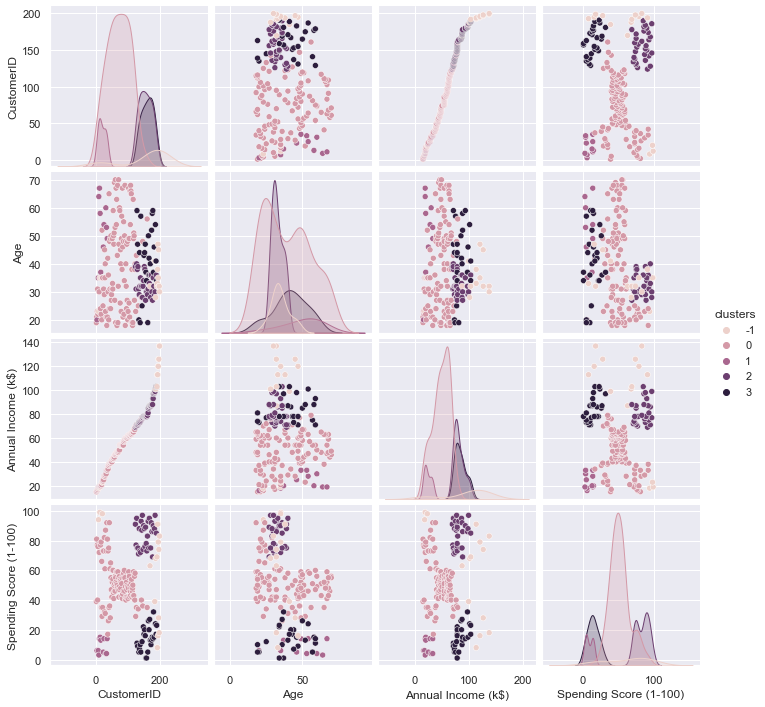

In [31]:
sns.pairplot(df_dbscan,hue='clusters')

In [32]:
df_dbscan.groupby('clusters')['Spending Score (1-100)','Annual Income (k$)'].describe()

<ipython-input-32-d158a9ae15ae>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_dbscan.groupby('clusters')['Spending Score (1-100)','Annual Income (k$)'].describe()


Spending Score (1-100)                                          \
                          count       mean        std   min   25%   50%   
clusters                                                                  
-1                         15.0  61.800000  31.783194   8.0  33.5  69.0   
 0                        115.0  51.730435  14.191869  17.0  42.0  50.0   
 1                         11.0   8.909091   4.968995   3.0   4.5   6.0   
 2                         32.0  83.625000   8.739048  69.0  75.0  86.0   
 3                         27.0  14.444444   8.025600   1.0   9.5  14.0   

                      Annual Income (k$)                                     \
            75%   max              count       mean        std   min    25%   
clusters                                                                      
-1        87.00  99.0               15.0  96.133333  41.745601  18.0  93.00   
 0        58.00  92.0              115.0  48.304348  15.705722  15.0  39.00   
 1        14.00  15.0               11.0  23.727273   6.294298  16.0  19.00   
 2        90.25  97.0               32.0  80.875000   9.300538  69.0  73.75   
 3        20.00  32.0               27.0  83.925926   9.914736  71.0  77.50   

                               
            50%    75%    max  
clusters                       
-1        113.0  123.0  137.0  
 0         49.0   61.5   79.0  
 1         20.0   29.0   33.0  
 2         78.0   87.0  103.0  
 3         81.0   88.0  103.0

In [33]:
df_dbscan.groupby('clusters')['Age'].describe() #Edad promedio por cluster

,count,mean,std,min,25%,50%,75%,max
clusters,,,,,,,,
-1,15.0,34.533333,6.232022,23.0,32.0,33.0,36.5,47.0
0,115.0,39.539130,16.050516,18.0,24.0,38.0,50.0,70.0
1,11.0,49.363636,14.073185,20.0,41.5,53.0,59.0,67.0
2,32.0,32.750000,3.868817,27.0,30.0,32.0,36.0,40.0
3,27.0,41.259259,11.729623,19.0,35.0,42.0,48.5,59.0


In [34]:
df_dbscan.groupby(['clusters','Gender']).count()

CustomerID  Age  Annual Income (k$)  Spending Score (1-100)
clusters Gender                                                             
-1       Female           9    9                   9                       9
         Male             6    6                   6                       6
 0       Female          68   68                  68                      68
         Male            47   47                  47                      47
 1       Female           6    6                   6                       6
         Male             5    5                   5                       5
 2       Female          18   18                  18                      18
         Male            14   14                  14                      14
 3       Female          11   11                  11                      11
         Male            16   16                  16                      16

In [35]:
df_dbscan_ruido = df_dbscan[df_dbscan.clusters == -1]

In [36]:
df_dbscan[df_dbscan.clusters == -1]

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),clusters
7,8,Female,23,18,94,-1
11,12,Female,35,19,99,-1
19,20,Female,35,23,98,-1
169,170,Male,32,87,63,-1
184,185,Female,41,99,39,-1
187,188,Male,28,101,68,-1
191,192,Female,32,103,69,-1
192,193,Male,33,113,8,-1
193,194,Female,38,113,91,-1
194,195,Female,47,120,16,-1


In [37]:
df_ruido = df.copy()

In [38]:
df_ruido = df_ruido.drop(['Gender',	'Age', 'Annual Income (k$)',	'Spending Score (1-100)'], axis = 1) 

In [39]:
df_ruido.head()

,CustomerID
0,1
1,2
2,3
3,4
4,5


In [40]:
df_union = pd.merge(df_dbscan_ruido, df_ruido, on="CustomerID")

In [41]:
df_union.shape #15 instancias que clasifico como ruido

(15, 6)

In [42]:
df_union.head(15) #Clasificacion por Kmeans de los puntos de ruido

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),clusters
0,8,Female,23,18,94,-1
1,12,Female,35,19,99,-1
2,20,Female,35,23,98,-1
3,170,Male,32,87,63,-1
4,185,Female,41,99,39,-1
5,188,Male,28,101,68,-1
6,192,Female,32,103,69,-1
7,193,Male,33,113,8,-1
8,194,Female,38,113,91,-1
9,195,Female,47,120,16,-1


In [43]:
df_union.groupby('cluster_kmeans').count()

KeyError: 'cluster_kmeans'

### Resultados DBSCAN

Descripción de los clusters:

Clientes objetivo
- Es el que mayor densidad presenta, es decir, la poblacion esta formada  por clientes que presentan ingresos y gastos medios. Además, hay personas que presentan altos ingresos y muy bajo nivel de gastos.
- Son clientes de todas las edades.
- El 60% de este cluster esta formado por personas del sexo femenino.

Clientes Standard Bajo
- Son clientes que poseen tanto sus ingresos como su nivel gastos bajos.
- Son personas de todas las edades pero el grueso esta conformado por mayores de 40 años.
-Equitativa cantidad de personas de sexo femenino y masculino.
- Se mantiene similar al grupo de Standar Bajo de k-means.

Clientes Standard Alto
- Son clientes cuyo nivel de gasto e ingresos son elevados.
- Esta conformado por personas jovenes, menores de 40 años.
- Presenta equitativa cantidad de clientes de sexo femenino y masculino.
- Se mantiene similar al grupo de Standar Alto de k-means.

Clientes Poco cautelosos
- La mayoría son jóvenes, siendo la edad máxima 35 años
- Son personas con bajos ingresos, pero con gastos elevados
- Equitativa distribución del sexo en relación a la edad
- Son aquellos clientes que por alguna razón, (como puede ser cercania, promociones con tarjetas, uso del patio de comida, etc), van seguido al Mall y compran productos con frecuencia. Es posible que los negocios, no se dirijan a estos clientes de manera particular, porque saben que no los perderán.

Comparativa con algoritmo Kmeans:
- A los puntajes más altos los identificó como ruido, en Kmeans se clusterizaron como cliente Poco cautelosos y standard alto.
- Parte de clientes objetivo los identificó como ruido (altos ingresos y bajos gastos).
- El cluster 0 (Clientes Objetivo) presenta una densidad muy alta en relación con los demás, dado que absorvió el cluster Clientes Standar Medio generado por Kmeans.
- Parte de los clientes Poco cautelosos los identificó como ruido. 

Concluimos que no genera buenos resultados dado que las densidades de los clusters son muy distintas y no es posible encontrar los parámetros Epsilon y minPts que sirvan para todos a la vez. Además etiqueta muchos de los puntos como ruido.

## Jerárquico

El tercer algoritmo a implementar es Clustering Jerárquico. 

- Se toman las dos columnas de interés del dataset original ya escaladas en este punto, 
- se aplica el modelo con la cantidad de cluster igual al n° de filas,
- se procede a entrenar el modelo y generar su dendograma,
- se identifican las líneas verticales de mayor importancia y se traza una línea horizontal a esa altura, luego, se cuenta la cantidad de líneas verticales intersectadas por ella,
- se aplica el modelo nuevamente, pero ahora con la cantidad de clusters igual a la cantidad de líneas verticales intersectadas en el paso anterior, en este caso fue de 5.
- se agrega una nueva columna al dataset original (que contiene todas las features) denominada 'cluster_jerarquico' que contiene el label resultante de la aplicación de Clustering Jerárquico para cada cliente,
- se realiza un análisis de cada cluster para encontrar características comunes y poder tomar decisiones.

In [44]:
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(distance_threshold=None, n_clusters=5)

In [45]:
model = model.fit(df_cluster)

In [46]:
# Number of clusters
model.n_clusters_

5

In [47]:
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster import hierarchy

In [48]:
Z = hierarchy.linkage(model.children_, 'ward')

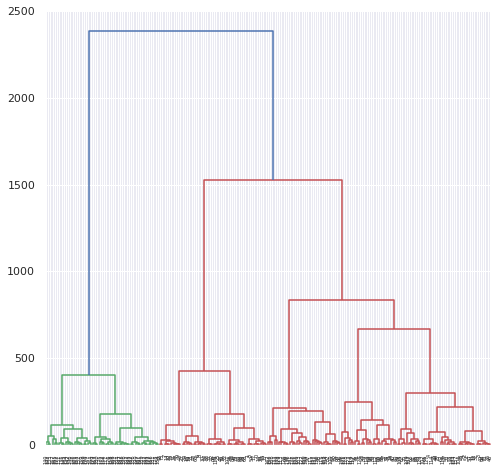

In [ ]:
plt.figure(figsize=(8,8))
dn = hierarchy.dendrogram(Z)

In [49]:
df_jerarquico=df_scan.copy()

In [50]:
df_jerarquico['clusters']=model.labels_

In [51]:
df_jerarquico.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),clusters
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4


In [52]:
df_jerarquico.groupby('clusters').count()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
clusters,,,,,
0,32,32,32,32,32
1,39,39,39,39,39
2,85,85,85,85,85
3,21,21,21,21,21
4,23,23,23,23,23


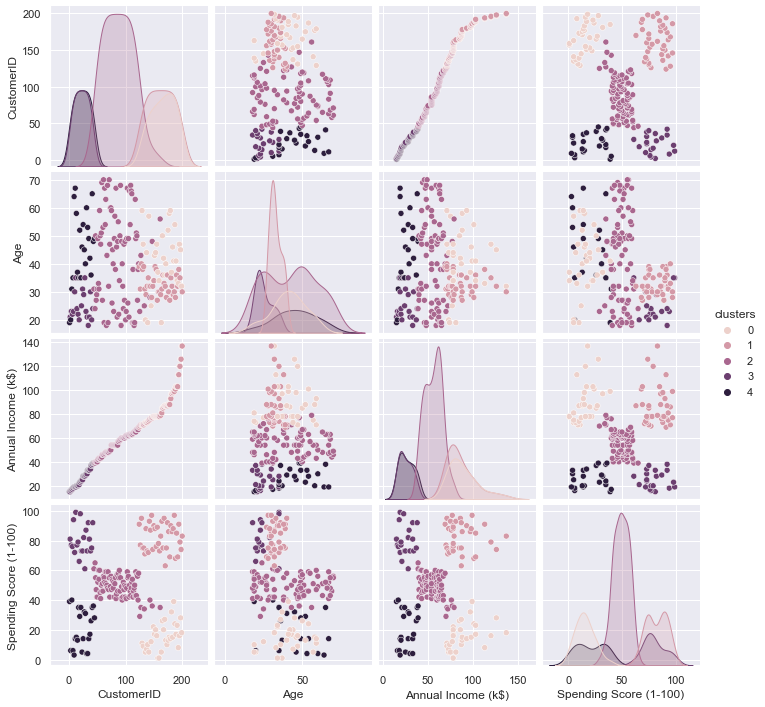

In [53]:
sns.pairplot(df_jerarquico,hue='clusters')

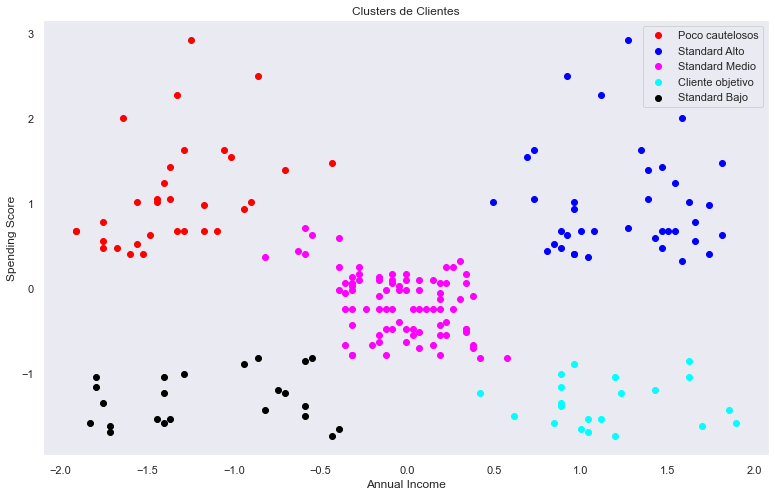

In [54]:
plt.figure(figsize=(13,8))
y_hat = model.fit_predict(df_cluster)
etiquetas_ = model.labels_
labels = ["Poco cautelosos","Standard Alto", "Standard Medio","Cliente objetivo","Standard Bajo"]
plt.scatter(df_cluster[y_hat == 0,0], df_cluster[y_hat == 0,1],c='red',label=labels[0])
plt.scatter(df_cluster[y_hat == 1,0], df_cluster[y_hat == 1,1],c='blue',label=labels[1])
plt.scatter(df_cluster[y_hat == 2,0], df_cluster[y_hat == 2,1],c='magenta',label=labels[2])
plt.scatter(df_cluster[y_hat == 3,0], df_cluster[y_hat == 3,1],c='cyan',label=labels[3])
plt.scatter(df_cluster[y_hat == 4,0], df_cluster[y_hat == 4,1],c='black',label=labels[4])
plt.legend()
plt.grid()
plt.title('Clusters de Clientes')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score');

In [55]:
df_jerarquico.groupby('clusters')['Spending Score (1-100)','Annual Income (k$)'].describe()

<ipython-input-55-621a711c1b18>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_jerarquico.groupby('clusters')['Spending Score (1-100)','Annual Income (k$)'].describe()


Spending Score (1-100)                                           \
                          count       mean        std   min    25%   50%   
clusters                                                                   
0                          32.0  15.593750   8.936548   1.0   9.75  15.0   
1                          39.0  82.128205   9.364489  63.0  74.50  83.0   
2                          85.0  49.129412   7.281399  29.0  43.00  49.0   
3                          21.0  80.047619  10.249274  61.0  73.00  77.0   
4                          23.0  20.913043  13.017167   3.0   9.50  17.0   

                     Annual Income (k$)                                    \
           75%   max              count       mean        std   min   25%   
clusters                                                                    
0         20.5  39.0               32.0  89.406250  16.612975  71.0  78.0   
1         90.0  97.0               39.0  86.538462  16.312485  69.0  75.5   
2         55.0  65.0               85.0  55.811765   9.731508  39.0  48.0   
3         87.0  99.0               21.0  25.095238   7.133756  15.0  19.0   
4         33.5  40.0               23.0  26.304348   7.893811  15.0  19.5   

                              
           50%    75%    max  
clusters                      
0         86.5  98.25  137.0  
1         79.0  95.00  137.0  
2         57.0  63.00   79.0  
3         24.0  30.00   38.0  
4         25.0  33.00   39.0

In [ ]:
df_jerarquico.groupby('clusters')['Age'].describe() #Edad promedio por cluster

,count,mean,std,min,25%,50%,75%,max
clusters,,,,,,,,
0,32.0,41.000000,11.036596,19.0,34.0,41.5,47.0,59.0
1,39.0,32.692308,3.728650,27.0,30.0,32.0,35.5,40.0
2,85.0,42.482353,16.395856,18.0,27.0,46.0,54.0,70.0
3,21.0,25.333333,5.378971,18.0,21.0,23.0,30.0,35.0
4,23.0,45.217391,13.228607,19.0,35.5,46.0,53.5,67.0


In [ ]:
df_jerarquico.groupby(['clusters','Gender']).count()

CustomerID  Age  ...  Spending Score (1-100)  cluster_kmeans
clusters Gender                   ...                                        
0        Female          14   14  ...                      14              14
         Male            18   18  ...                      18              18
1        Female          21   21  ...                      21              21
         Male            18   18  ...                      18              18
2        Female          51   51  ...                      51              51
         Male            34   34  ...                      34              34
3        Female          12   12  ...                      12              12
         Male             9    9  ...                       9               9
4        Female          14   14  ...                      14              14
         Male             9    9  ...                       9               9

[10 rows x 5 columns]

### Resultados C Jerárquico

Descripción de los clusters:

Clientes objetivo
- Son personas que presentan altos ingresos y bajo nivel de gastos.
- El grueso de los clientes tienen edad media en el rango que va desde los 40 a 59 años.
- Equitativa cantidad de personas de sexo femenino y masculino.

Clientes Standard Alto
- Son clientes cuyo nivel de gasto e ingresos son elevados.
- Esta conformado por personas jovenes, menores de 40 años.
- Presenta equitativa cantidad de clientes de sexo femenino y masculino.

Clientes Standard Medio
- Es el cluster que presenta mayor cantidad de clientes, esta formado personas que presentan ingresos y gastos medios.
- Son clientes de todas las edades.
- El 60% de este cluster esta formado por personas del sexo femenino.

Clientes Poco cautelosos:
- Son personas que presentan bajos ingresos pero gastos elevados.
- Son clientes jovenes menores de 35 años.
- Equitativa distribución del sexo. 

Clientes Standard Bajo
- Son clientes que poseen tanto sus ingresos como su nivel gastos bajos.
- Amplio rango de edad pero el grueso de los clientes se encuentra por arriba de los 40 años.
-Presenta una ligera predominancia de mujeres.

Este modelo clusteriza de una forma bastante similar a Kmeans.

## PCA

Se considera que para este caso de estudio no es necesario realizar una reducción de la dimensionalidad con PCA, esto es, debido a que se toman únicamente dos variables en consideración a la hora de determinar los clusters, entonces no existe la posibilidad de reducir dimensiones.



Por otro lado, se realiza un análisis adicional, **únicamente para poner en práctica el algoritmo de PCA**, donde se considera el dataset original completo con todas sus features. 

Se reduce a 2D y luego se aplica k-means para ver resultados. Aun así, se puede observar que con 2D PCA solamente mantiene el 70% de la información original, generando mucho sesgo en los clusters resultantes. Se puede tomar la decisión de agregar una dimensión más, es decir PCA a 3D, o directamente considerar que para este análisis no es necesario aplicar PCA.

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
modelo_pca = PCA(n_components =2)
pca = modelo_pca.fit_transform(df_scaler) 

In [ ]:
modelo_pca.explained_variance_ratio_ #indica cuales son las variable mas explicativa (mayor varianza)

array([0.4095285, 0.3081674])

Text(0, 0.5, 'pca[:,1]')

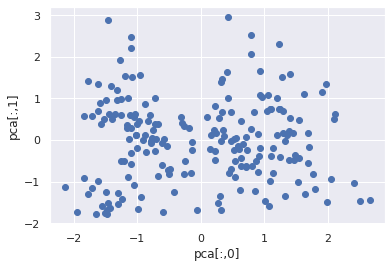

In [ ]:
plt.scatter(pca[:,0], pca[:,1])
plt.xlabel('pca[:,0]')
plt.ylabel('pca[:,1]')